# Regresión lineal Método Dinámico

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math as mth
from random import random, randint
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.stats import norm 
import matplotlib.pyplot as plt

#Carga de archivos
%matplotlib inline
df=pd.read_csv("regLin.csv")

In [2]:
#Inserto X0
df['X0']=1
columna = df['X0']
del df['X0']
df.insert(0, 'X0', columna)
df.head(3)
len(df)
X, X_t, Y, Y_t = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)
X=np.array(X)
Y=np.array(Y)

In [10]:
w0=[1,2]
w0[1]
X=(X-np.median(X,0))/np.std(X,0)
X[:,0]=1
X

array([[ 1.        ,  0.20714406],
       [ 1.        , -0.98124284],
       [ 1.        , -1.34097931],
       ..., 
       [ 1.        , -0.64018319],
       [ 1.        ,  0.70281308],
       [ 1.        ,  1.60783291]])

In [11]:
winicial=[1,2]
w=np.zeros((len(X),len(winicial)))
e=np.zeros(len(X))
eta=0.05

In [12]:

for i in range(len(X)):
    y_est=0.0
    error=0.0
    for j in range(len(winicial)):
        if i == 0:
            y_est=winicial[j]*X[i][j]+y_est     
            
        if i>0 : 
            y_est=w[i-1][j]*X[i][j]+y_est
     
    error=Y[i]-y_est
    e[i]=error
    
    for k in range(len(winicial)):
        if i==0:
            w[i][j]=winicial[k]+eta*error*X[i][k] 
        
        if i > 0:
            w[i][k]=w[i-1][k]+(eta*error*X[i][k])    
    

In [13]:
w0=w[:,0]
w1=w[:,1]

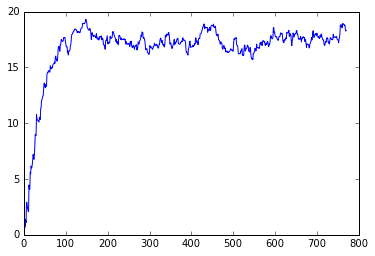

In [14]:
plt.plot(range(len(w1)),w1)

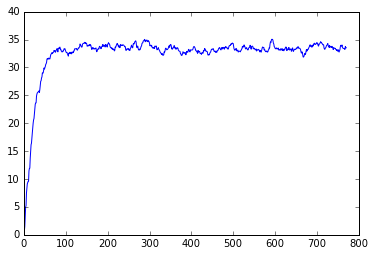

In [15]:
plt.plot(range(len(w0)),w0)

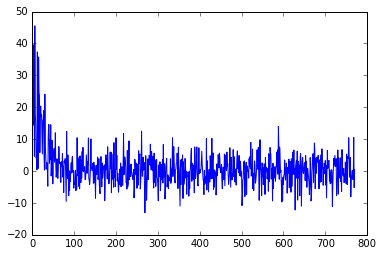

In [16]:
plt.plot(range(len(e)),e)
